<a href="https://colab.research.google.com/github/tariqrasheed172001/Prediction-of-Depression-levels./blob/main/Model_building.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model building

In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA

In [37]:
dataset = pd.read_csv('/content/labeled_dataset.csv')
dataset

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Depression
0,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0,2.0,0.0,...,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1
1,0.0,1.0,3.0,2.0,1.0,1.0,0.0,2.0,2.0,1.0,...,2.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,3.0,1
2,0.0,0.0,3.0,3.0,1.0,0.0,0.0,2.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,0
3,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,1.0,0.0,0.0,1.0,1.0,2.0,2.0,0.0,3.0,3.0,...,1.0,0.0,3.0,3.0,2.0,0.0,2.0,0.0,1.0,2
636,1.0,1.0,1.0,8.0,1.0,3.0,0.0,0.0,2.0,3.0,...,2.0,0.0,1.0,3.0,2.0,1.0,2.0,2.0,1.0,2
637,1.0,0.0,2.0,8.0,0.0,3.0,3.0,2.0,3.0,0.0,...,2.0,3.0,0.0,3.0,2.0,2.0,0.0,1.0,3.0,2
638,1.0,0.0,2.0,7.0,1.0,2.0,0.0,0.0,0.0,3.0,...,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,3.0,2


In [38]:
# If there are missing values, replace them with the mean of the column
imputer = SimpleImputer(strategy='mean')
dataset = pd.DataFrame(imputer.fit_transform(dataset), columns=dataset.columns)

# Shuffle the dataset
dataset = dataset.sample(frac=1, random_state=20)

kmeans_labels = dataset['Depression']

X = dataset.drop(columns=['Depression'])

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, kmeans_labels, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.9141
F1 Score: 0.9095

Naive Bayes:
Accuracy: 0.8047
F1 Score: 0.8042

SVM:
Accuracy: 0.8828
F1 Score: 0.8779

Gaussian SVM:
Accuracy: 0.8828
F1 Score: 0.8779

Decision Tree:
Accuracy: 0.9062
F1 Score: 0.8956

KNN:
Accuracy: 0.8516
F1 Score: 0.8371

Bagging:
Accuracy: 0.8828
F1 Score: 0.8744

Random Forest:
Accuracy: 0.8984
F1 Score: 0.8944



<ipython-input-46-22e1946593d0>:62: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(algorithms), y=list(accuracy_scores), palette='viridis')


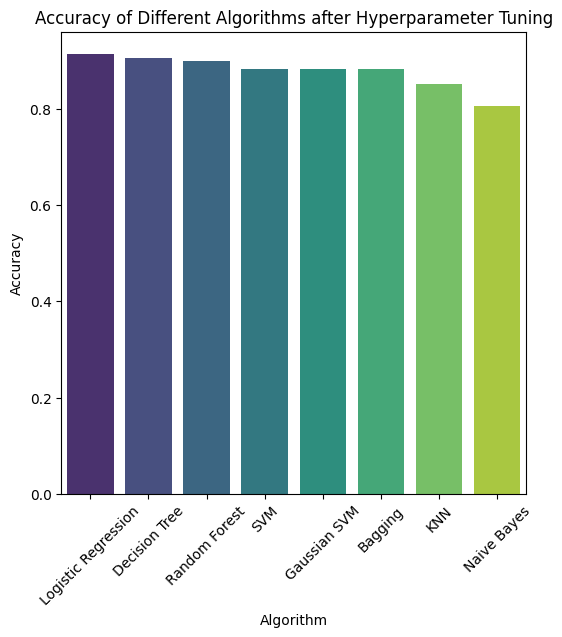

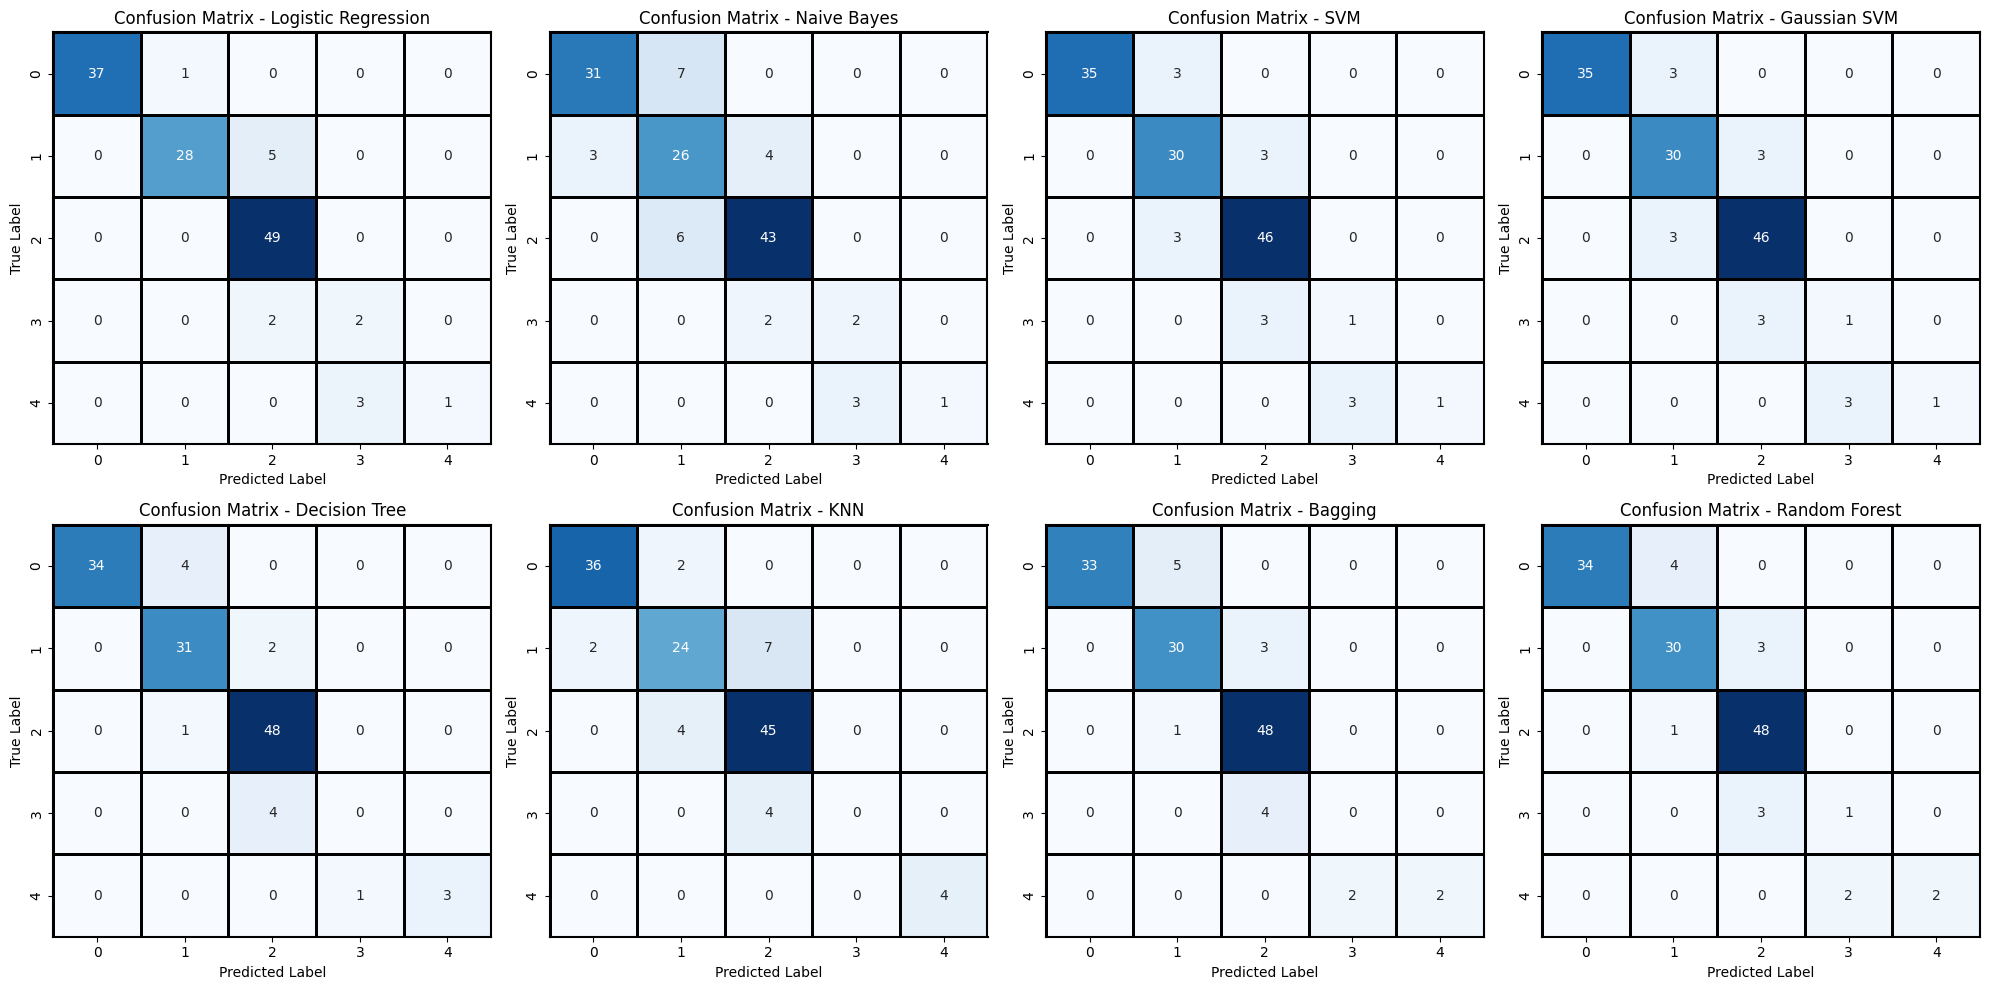

In [46]:
# X_train and X_test are our training and testing feature matrices, respectively

# Initialize PCA with desired number of components
n_components = 10  # Value based on the desired number of components
pca = PCA(n_components=n_components)

# Fit PCA on the training data and transform both training and testing data
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Now X_train_pca and X_test_pca contain the transformed feature matrices with reduced dimensionality

# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Naive Bayes": GaussianNB(),
    "SVM": SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42),
    "Gaussian SVM": SVC(kernel='rbf'),  # Gaussian SVM
    "Decision Tree": DecisionTreeClassifier(max_depth=5, min_samples_split=2, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Bagging": BaggingClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
}

# Placeholder dictionaries to store accuracies and F1 scores
accuracies = {}
f1_scores = {}
conf_matrices = []

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the classifier
    clf.fit(X_train_pca, y_train)

    # Predict labels for the test set
    y_pred = clf.predict(X_test_pca)

    # Calculate accuracy and F1 score
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Store the results
    accuracies[name] = accuracy
    f1_scores[name] = f1
    conf_matrices.append((name, cm))

    # Print results
    print(f"{name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print()

# Plotting accuracy vs algorithm name bar plot
accuracy_list = [(name, acc) for name, acc in accuracies.items()]
accuracy_list.sort(key=lambda x: x[1], reverse=True)
algorithms, accuracy_scores = zip(*accuracy_list)

plt.figure(figsize=(6, 6))
sns.barplot(x=list(algorithms), y=list(accuracy_scores), palette='viridis')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms after Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.show()

# Plotting confusion matrices side by side with borders
num_classifiers = len(classifiers)
fig, axes = plt.subplots(2, (num_classifiers + 1) // 2, figsize=(20, 10))

for (name, cm), ax in zip(conf_matrices, axes.flatten()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, linewidths=1, linecolor='black')
    ax.set_title(f'Confusion Matrix - {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    # Add border
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.5)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Naive Bayes: {'var_smoothing': 0.01}
Accuracy for Naive Bayes: 0.7734375



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy for SVM: 0.9296875



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Gaussian SVM: {'C': 10, 'gamma': 'scale'}
Accuracy for Gaussian SVM: 0.90625



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy for Decision Tree: 0.59375



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for KNN: {'algorithm': 'auto', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy for KNN: 0.796875



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Bagging: {'bootstrap': True, 'bootstrap_features': True, 'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 100}
Accuracy for Bagging: 0.7890625



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy for Random Forest: 0.8046875



<ipython-input-43-6335091f7079>:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(algorithms), y=list(accuracy_scores), palette='viridis')


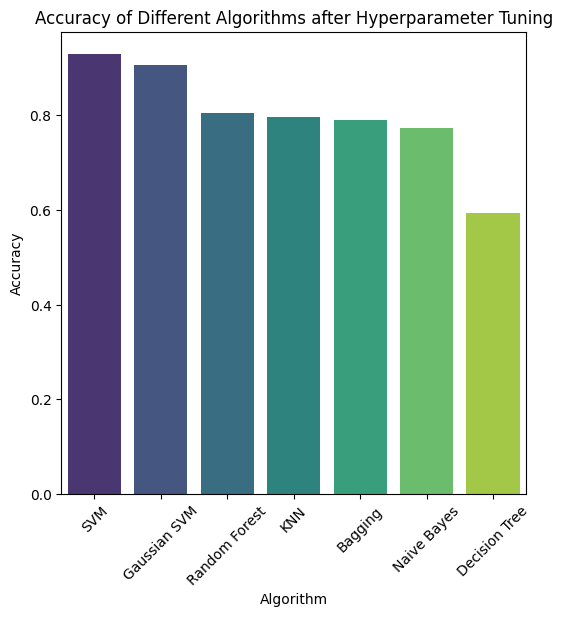

In [43]:
from sklearn.model_selection import GridSearchCV

# Define classifiers and their parameter grids
classifiers = {
    "Naive Bayes": (GaussianNB(), {
        'var_smoothing': np.logspace(-9, 0, 10)
    }),
    "SVM": (SVC(random_state=42), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto'],
        'kernel': ['linear', 'rbf', 'poly']
    }),
    "Gaussian SVM": (SVC(kernel='rbf'), {
        'C': [0.1, 1, 10],
        'gamma': ['scale', 'auto']
    }),
    "Decision Tree": (DecisionTreeClassifier(random_state=42), {
        'max_depth': [3, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }),
    "KNN": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    }),
    "Bagging": (BaggingClassifier(random_state=42), {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'max_features': [0.5, 1.0],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }),
    "Random Forest": (RandomForestClassifier(random_state=42), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    })
}

# Dictionary to store best estimators and their accuracies
best_estimators = {}
accuracies = []
conf_matrices = []

# Perform grid search for each classifier
for name, (clf, param_grid) in classifiers.items():
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_estimators[name] = grid_search.best_estimator_
    y_pred = grid_search.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))
    conf_matrices.append((name, confusion_matrix(y_test, y_pred)))
    print(f"Best Hyperparameters for {name}: {grid_search.best_params_}")
    print(f"Accuracy for {name}: {accuracy}\n")

# Plotting accuracy vs algorithm name
accuracies.sort(key=lambda x: x[1], reverse=True)
algorithms, accuracy_scores = zip(*accuracies)

plt.figure(figsize=(6, 6))
sns.barplot(x=list(algorithms), y=list(accuracy_scores), palette='viridis')
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms after Hyperparameter Tuning')
plt.xticks(rotation=45)
plt.show()



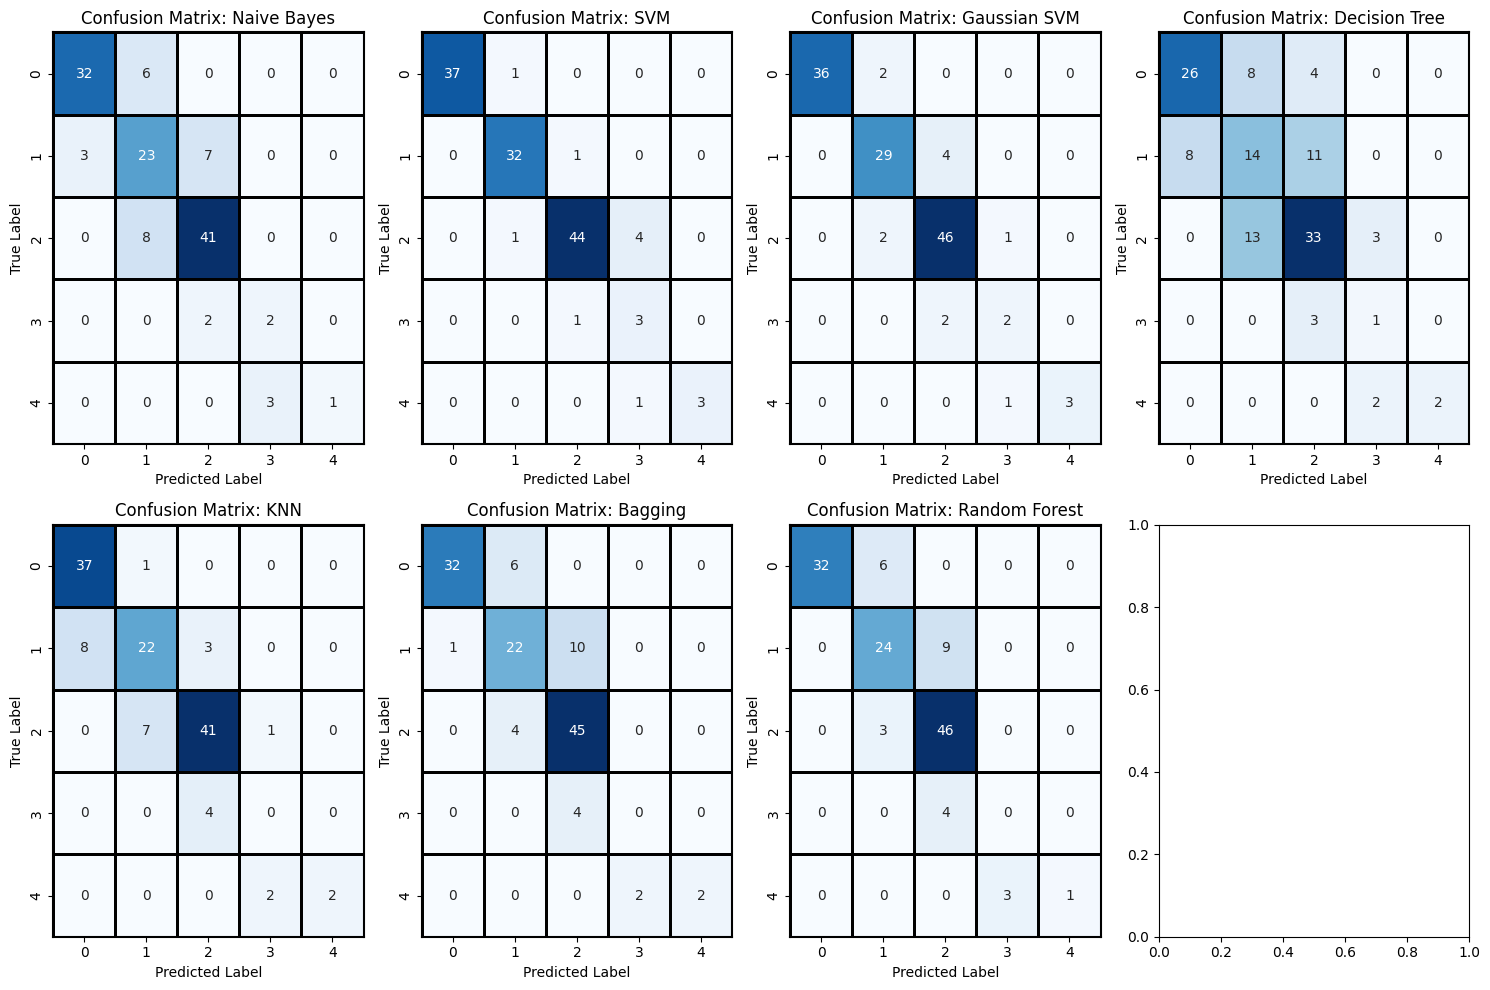

In [44]:
# Plotting confusion matrices side by side with borders
num_classifiers = 8
fig, axes = plt.subplots(2, (num_classifiers + 1) // 2, figsize=(15, 10))

for (name, conf_matrix), ax in zip(conf_matrices, axes.flatten()):
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax, linewidths=1, linecolor='black')
    ax.set_title(f'Confusion Matrix: {name}')
    ax.set_xlabel('Predicted Label')
    ax.set_ylabel('True Label')
    # Add border
    for _, spine in ax.spines.items():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1.5)

# Adjust layout to avoid overlapping
plt.tight_layout()
plt.show()